<a href="https://colab.research.google.com/github/gui90ar/Bootcamp_cognizant_eng_dados/blob/main/Analise_de_dados_cognizant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importandoa as bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
#upload do arquivo
from google.colab import files
arq= files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
#criando nosso dataframe
df= pd.read_excel('AdventureWorks.xlsx')

In [6]:
#visualisando as primeiras linhas
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
df.shape

(904, 16)

In [8]:
# Verificando os tipos dedados
df.dtypes


Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
#Qual a receita total
df['Valor Venda'].sum()

5984606.1426

In [10]:

#Qual o custo total
df['Custo'] = df['Custo Unitário']*df['Quantidade']
df['Custo']

0      2091.48
1      2091.48
2      2091.48
3      2091.48
4      2091.48
        ...   
899    1985.94
900    1948.14
901    1948.14
902    1985.94
903    1948.14
Name: Custo, Length: 904, dtype: float64

In [11]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
round(df['Custo'].sum(),2)

2486783.05

In [13]:
#Criando a coluna Receita

df['Lucro'] = df['Valor Venda'] - df['Custo']
df['Lucro']

0      2456.52
1      2456.52
2      2456.52
3      2456.52
4      2456.52
        ...   
899    3588.48
900    2755.86
901    2755.86
902    2809.26
903    2755.86
Name: Lucro, Length: 904, dtype: float64

In [14]:

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [15]:
#Calculando o Lucro
round(df['Lucro'].sum(),2)

3497823.09

In [16]:
#criando coluna de total de dias para enviar um produto

df['Tempo de envio']= df['Data Envio'] - df['Data Venda'] 


In [17]:
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days


In [18]:
# Extraindo apenas os dias
df['Tempo de envio'] = (df['Data Envio'] - df['Data Venda']).dt.days


In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [20]:
df['Tempo de envio'].dtypes

dtype('int64')

In [21]:
#Media de tempo de envio por marca
round(df.groupby('Marca')['Tempo de envio'].mean(),0)

Marca
Adventure Works    9.0
Contoso            8.0
Fabrikam           9.0
Name: Tempo de envio, dtype: float64

In [22]:
#Verificando valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo de envio    0
dtype: int64

###Lucro por ano e marca

In [23]:
#Agrupamento por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()



Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [24]:
pd.options.display.float_format = '{:20,.2f}'.format

In [25]:
#Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano


,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [26]:
#Qual a qantidade de produtos vendidos ?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False).reset_index()

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


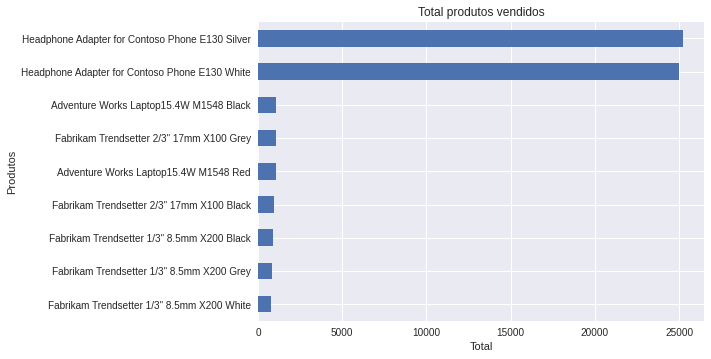

In [27]:
#Grafico Total de produtos vendidos
a = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = True)
a.plot.barh(title = 'Total produtos vendidos')
plt.xlabel('Total')
plt.ylabel('Produtos');

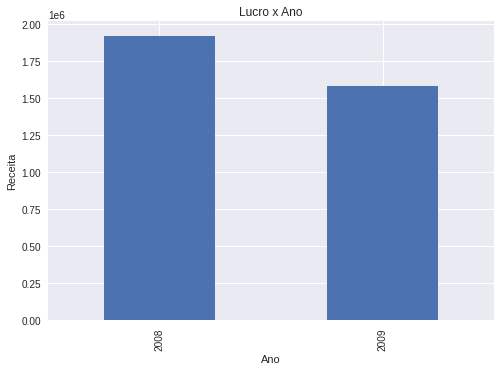

In [28]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [31]:
#selecionando apenas as vendas de 2009

df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


Text(0, 0.5, 'Lucro')

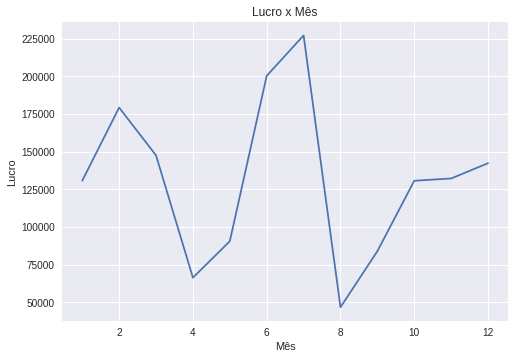

In [33]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title = 'Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

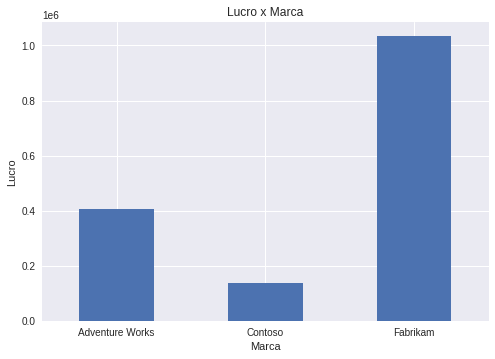

In [37]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title= 'Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [38]:
df['Tempo de envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de envio, dtype: float64

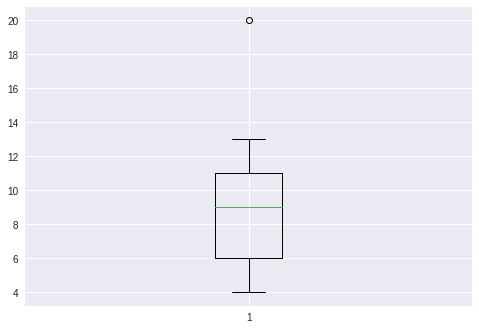

In [43]:
#Grafico de boxplot
b=plt.boxplot(df['Tempo de envio']);


(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

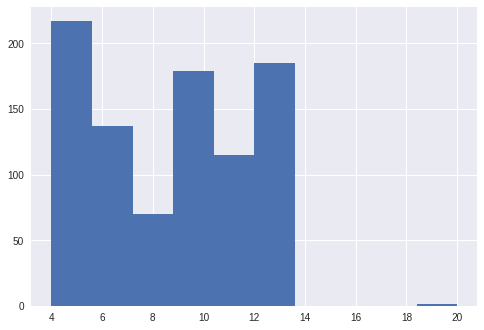

In [45]:
plt.hist(df['Tempo de envio'])

In [46]:
# Tempo minimo de envio 
df['Tempo de envio'].min()

4

In [49]:
#Tempo maximo de envio 
df['Tempo de envio'].max()

20

In [50]:
#Identificando o Outlier
df[df['Tempo de envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [51]:
df.to_csv('df_vendas_novo.csv', index=False)

# Nova seção